In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [432]:
mpl.rcParams['figure.figsize']=(12,8)
markers = ['o', '^', 'v', 'x', 's']

In [433]:
hc_e = 1.98644586e-25/1.602176634e-19

def load(i):
    s = pd.read_csv(f'./series{i}.txt', delimiter=' ', header=None)
    s.columns = ['l', 'dl']
    s['E'] = hc_e/s.l*1e10
    s['dE'] = s.E*s.dl/s.l
    
    s['delta_E'] = list(s.E.iloc[1:].values - s.E.iloc[:-1].values) + [None]
    
    s.reset_index(inplace=True)
    s.columns= ['n'] + list(s.columns[1:])
    return s

In [434]:
series = list(map(load, range(1,6)))
series[3]

,n,l,dl,E,dE,delta_E
0,0,6421.321681,0.751969,1.930821,0.000226,0.014236
1,1,6374.323620,0.751969,1.945057,0.000229,0.014447
2,2,6327.325560,0.751969,1.959504,0.000233,0.014309
3,3,6281.455453,0.375984,1.973813,0.000118,0.013801
4,4,6237.841253,0.751969,1.987614,0.000240,0.013752
5,5,6194.979022,0.751969,2.001366,0.000243,NaN


In [435]:
df = pd.DataFrame()
for i, s in enumerate(series):
    d = s.copy()
    d.loc[:, "series"] = [i+1]*d.shape[0]
    df = pd.concat((df, d))

In [457]:
print(
y.style.hide(axis=0).format(formatter={
    "series": "{:.0f}",
    "n": "{:.0f}",
    "l": "{:.1f}",
    "dl": "{:.1f}",
    "E": "{:.3f}",
    "dE": "{:.2e}",
}).to_latex(caption="Результаты измерений серий", hrules=True, position='h!')
)

\begin{table}[h!]
\caption{Результаты измерений серий}
\begin{tabular}{rrrrrrrrrrrr}
\toprule
series & n & l & dl & E & dE & series & n & l & dl & E & dE \\
\midrule
1 & 0 & 5742.3 & 0.5 & 2.159 & 1.99e-04 & 2 & 4 & 5686.7 & 0.3 & 2.180 & 1.07e-04 \\
1 & 1 & 5710.2 & 0.4 & 2.171 & 1.34e-04 & 2 & 5 & 5657.1 & 0.6 & 2.192 & 2.16e-04 \\
1 & 2 & 5679.0 & 0.4 & 2.183 & 1.36e-04 & 2 & 6 & 5629.0 & 0.6 & 2.203 & 2.18e-04 \\
1 & 3 & 5647.9 & 0.2 & 2.195 & 6.87e-05 & 2 & 7 & 5600.5 & 0.6 & 2.214 & 2.20e-04 \\
1 & 4 & 5618.2 & 0.4 & 2.207 & 1.39e-04 & 2 & 8 & 5574.3 & 0.6 & 2.224 & 2.22e-04 \\
1 & 5 & 5589.5 & 0.2 & 2.218 & 7.01e-05 & 2 & 9 & 5547.8 & 0.6 & 2.235 & 2.25e-04 \\
1 & 6 & 5561.5 & 0.3 & 2.229 & 1.06e-04 & 2 & 10 & 5523.0 & 0.6 & 2.245 & 2.27e-04 \\
1 & 7 & 5534.7 & 0.3 & 2.240 & 1.07e-04 & 2 & 11 & 5498.5 & 0.8 & 2.255 & 3.43e-04 \\
1 & 8 & 5508.5 & 0.3 & 2.251 & 1.08e-04 & 2 & 12 & 5474.8 & 0.6 & 2.265 & 2.31e-04 \\
1 & 9 & 5483.4 & 0.4 & 2.261 & 1.46e-04 & 2 & 13 & 5451.9 & 0.6 & 

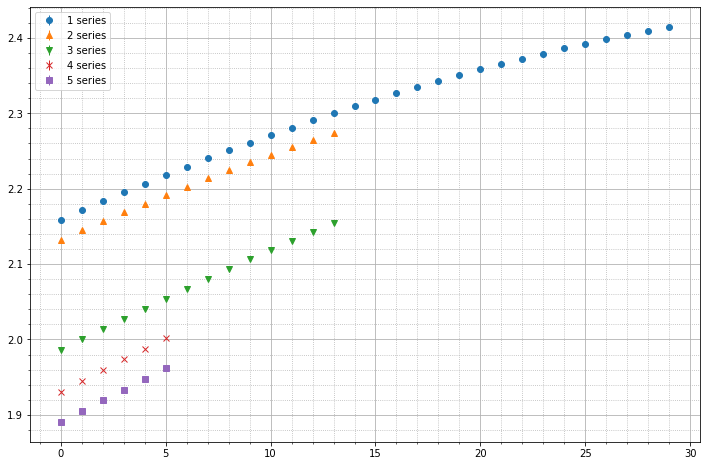

In [458]:
for i, s in enumerate(series):
    plt.errorbar(s.index, s.E, yerr=s.dE, label=f'{i+1} series', lw=0, marker=markers[i], elinewidth=1)

plt.grid(True)
plt.minorticks_on()
plt.grid(True, which='minor', linestyle=':')
plt.legend()

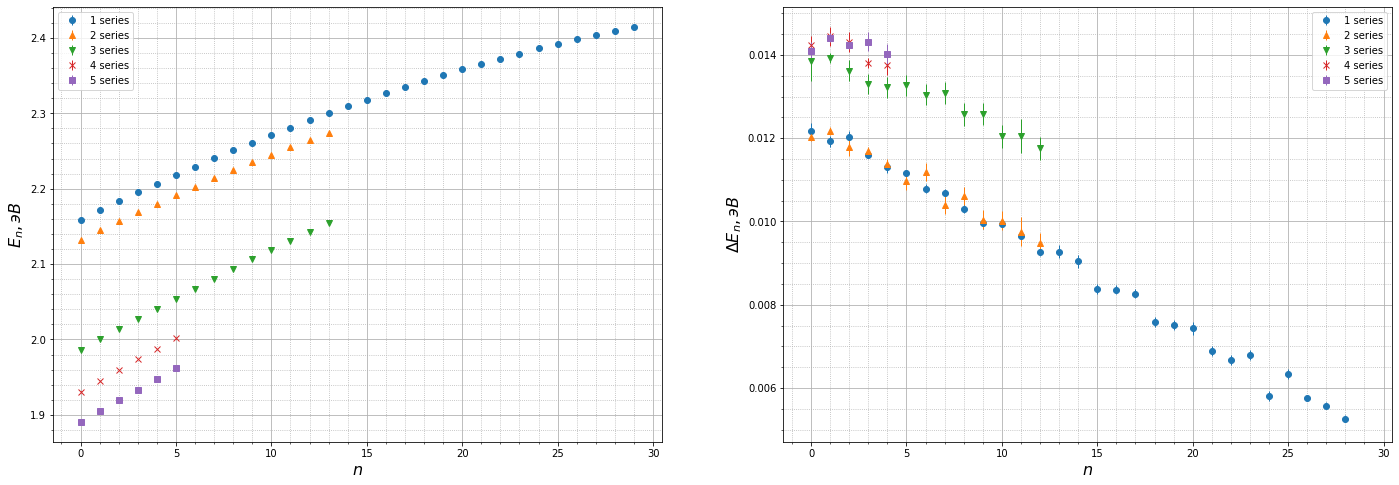

In [461]:
plt.figure(figsize=(24,8))
for i, s in enumerate(series):
    plt.subplot(122)
    plt.errorbar(s.n, s.delta_E, yerr=s.dE, label=f'{i+1} series', lw=0, marker=markers[i], elinewidth=1)
    plt.subplot(121)
    plt.errorbar(s.n, s.E, yerr=s.dE, label=f'{i+1} series', lw=0, marker=markers[i], elinewidth=1)
    
plt.subplot(121)
plt.xlabel(r"$n$", fontsize=16)
plt.ylabel(r"$E_n, эВ$", fontsize=16)
plt.grid(True)
plt.minorticks_on()
plt.grid(True, which='minor', linestyle=':')
plt.legend()

plt.subplot(122)
plt.xlabel(r"$n$", fontsize=16)
plt.ylabel(r"$\Delta E_n, эВ$", fontsize=16)
plt.grid(True)
plt.minorticks_on()
plt.grid(True, which='minor', linestyle=':')
plt.legend()

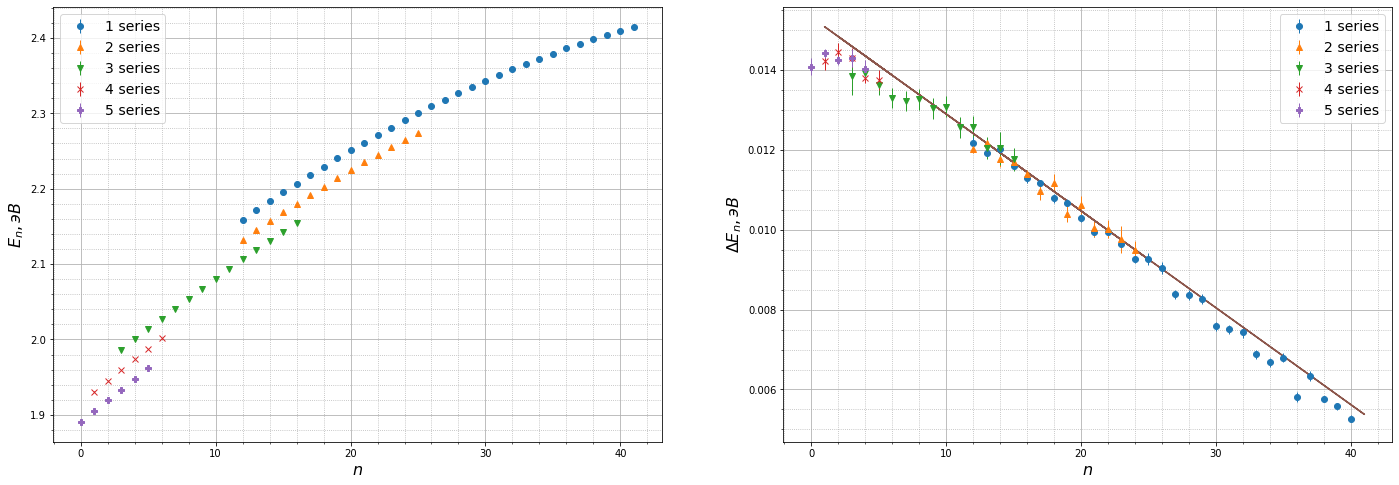

In [464]:
delta_n = np.array([12, 12, 3, 1, 0]) - 0*np.array([1, 1, 1, 1, 0])
for i in range(len(series)):
    series[i]['n_prime'] = series[i]['n'] + delta_n[i]

markers = ['o', '^', 'v', 'x', 'P']

all_delta_E = []
all_delta_dE = []
all_n_prime = []
plt.figure(figsize=(24,8))
for i, s in enumerate(series):
    plt.subplot(122)
    plt.errorbar(s.n_prime, s.delta_E, yerr=s.dE, label=f'{i+1} series', lw=0, marker=markers[i], elinewidth=1)
    all_delta_E.extend(s.delta_E.dropna().to_list())
    all_delta_dE.extend(s.dE[:-1].dropna().to_list())
    all_n_prime.extend(s.n_prime[:-1].dropna().to_list())

    plt.subplot(121)
    plt.errorbar(s.n_prime, s.E, yerr=s.dE, label=f'{i+1} series', lw=0, marker=markers[i], elinewidth=1)

all_n_prime = np.array(all_n_prime)
all_delta_dE = np.array(all_delta_dE)

(k, b), cov = np.polyfit(all_n_prime+1, np.array(all_delta_E), w=1/all_delta_dE, deg=1, cov=True)
cov = np.sqrt(cov.diagonal())

plt.subplot(121)
plt.xlabel(r"$n$", fontsize=16)
plt.ylabel(r"$E_n, эВ$", fontsize=16)
plt.grid(True)
plt.minorticks_on()
plt.grid(True, which='minor', linestyle=':')
plt.legend(fontsize=14)

plt.subplot(122)
plt.plot((all_n_prime+1), (all_n_prime+1)*k + b)
plt.xlabel(r"$n$", fontsize=16)
plt.ylabel(r"$\Delta E_n, эВ$", fontsize=16)

plt.grid(True)
plt.minorticks_on()
plt.grid(True, which='minor', linestyle=':')
plt.legend(fontsize=14)

In [191]:
k, b, cov

(-0.0002427820363298319,
 0.01533047043751561,
 array([2.28504447e-06, 6.12405746e-05]))

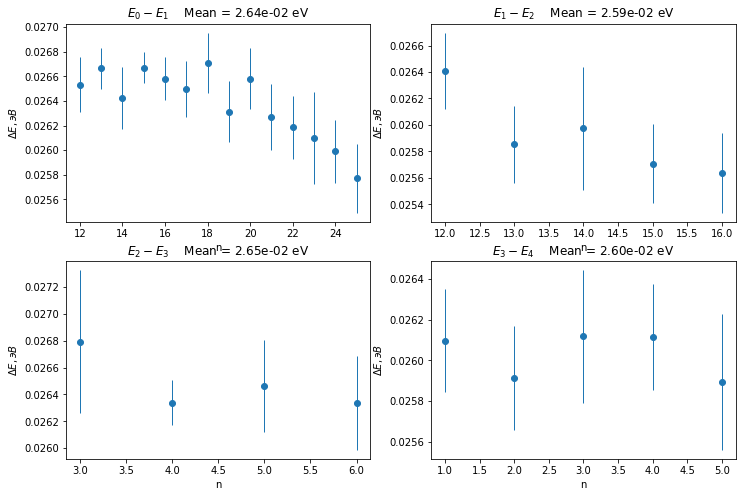

In [471]:
delta_E_means = []
delta_E_means_err = []
for k, (i1, i2) in enumerate(zip(range(4), range(1, 5))):
# i1, i2 = 1, 0
    maski1 = series[i1].n_prime.isin(series[i2].n_prime)

    maski2 = series[i2].n_prime.isin(series[i1].n_prime)
    general_n = series[i1].n_prime[maski1].values

    delta_E_gen_n = series[i1][maski1].E.values - series[i2][maski2].E.values
    E_err = np.sqrt(series[i1][maski1].dE.values**2 + series[i2][maski2].dE.values**2)
    
    plt.subplot(2,2,k+1)
    plt.title(r"$E_%d - E_%d \quad$ Mean = %.2e eV" % (k, k+1, delta_E_gen_n.mean()))
    plt.errorbar(general_n, delta_E_gen_n, yerr=E_err, lw=0, elinewidth=1, marker='o')
    plt.ylabel(r"$\Delta E, эВ$")
    plt.xlabel(r"n")

    mean = delta_E_gen_n.mean()

    delta_E_means.append(mean)
    delta_E_means_err.append(np.sqrt((E_err**2/len(E_err)).sum()))

    # if k == 0:
    #     (w, b), cov = np.polyfit(general_n, delta_E_gen_n, deg=1, cov=True)
    #     cov = np.sqrt(cov.diagonal())
    #     plt.plot(general_n, w*general_n+b)

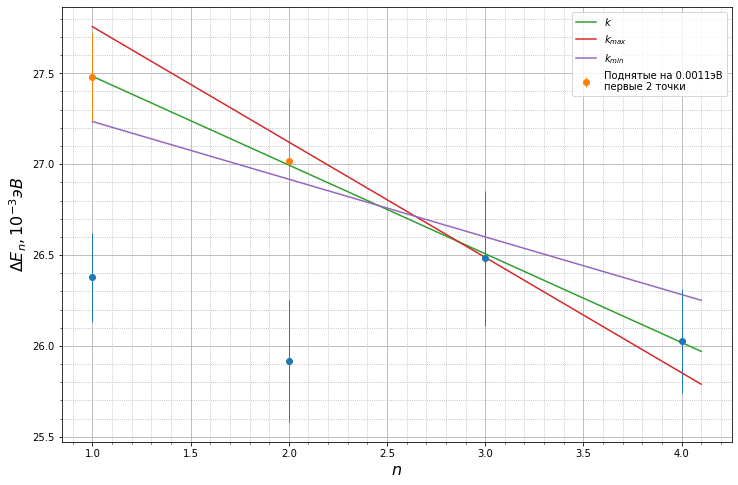

In [472]:
delta_E_means = np.array(delta_E_means) 
delta_E_means_err = np.array(delta_E_means_err) 

plt.errorbar(range(1, 5), delta_E_means*1e3, yerr=delta_E_means_err*1e3, lw=0, elinewidth=1, marker='o')

delta_E_means[:2] += 0.0011

plt.errorbar(range(1, 3), delta_E_means[:2]*1e3, yerr=delta_E_means_err[:2]*1e3, lw=0, elinewidth=1, marker='o', label="Поднятые на 0.0011эВ\nпервые 2 точки")

(k, b), cov = np.polyfit(range(1, 5), delta_E_means, cov=True, deg=1)
cov = np.sqrt(cov.diagonal())

var_n = np.linspace(1, 4.1, 10)
plt.plot(var_n, (k*var_n + b)*1e3, label=r'$k$')
plt.plot(var_n, (1.3*k*var_n + 1.015*b)*1e3, label=r'$k_{max}$')
plt.plot(var_n, (0.65*k*var_n + 0.985*b)*1e3, label=r'$k_{min}$')

# plt.plot(var_n, (-1.5*k)*var_n + b-1.5e-4, label=r'$k_{max}$')
# plt.plot(var_n, (-0.5*k)*var_n + b-1e-4, label=r'$k$')

plt.ylabel(r"$\Delta E_n, 10^{-3} эВ$", fontsize=16)
plt.xlabel(r"$n$", fontsize=16)

plt.grid(True)
plt.minorticks_on()
plt.grid(True, which='minor', linestyle=':')
plt.legend()

In [375]:
np.mean(delta_E_means), np.std(delta_E_means)

(0.02675107355746723, 0.0005460269712342967)

In [376]:
print(k, b)
print(cov/np.array(k, b))

-0.00048815056117411534 0.027971449960402517
[-0.02174707 -0.0595568 ]


In [383]:
# alpha_gr = 
f"{np.sqrt(-k*1.6e-19*(126.9/2*1.67e-27)/(1.054571817e-34)**2):2e} m^-1"

'2.727940e+10 m^-1'

In [474]:
0.000488, 4.8e-4

(0.000488, 0.00048)

In [479]:
126.9/2

63.45

In [387]:
first_diff = {}
first_diff_err = {}
for i, s in enumerate(series):
    for k in s.n_prime.values[:-1]:
        first_diff.setdefault(k, []) 
        first_diff_err.setdefault(k, []) 
        assert s[s.n_prime==k].delta_E.iloc[0] != None
        first_diff[k].extend(s[s.n_prime==k].delta_E.to_list())
        first_diff_err[k].extend(s[s.n_prime==k].dE.dropna().to_list())

for k, v in first_diff.items():
    first_diff[k] = np.mean(v)
    first_diff_err[k] = np.mean(v)

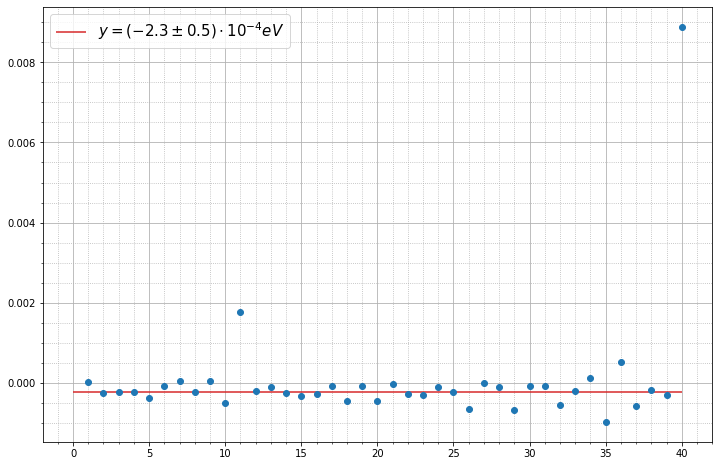

In [390]:
tmp_n = np.array(list(first_diff.keys()))
tmp_delta_E = np.array(list(first_diff.values()))
tmp_delta_E_err = np.array(list(first_diff_err.values()))
second_diff_vals = tmp_delta_E[1:]-tmp_delta_E[:-1]
# second_diff_vals_err = tmp_delta_E_err[1:]

plt.errorbar(tmp_n[:-1], second_diff_vals, lw=0, elinewidth=1, marker='o')
plt.hlines(second_diff_vals[second_diff_vals<0.001].mean(), tmp_n.min(), tmp_n.max(), color='tab:red',
 label=r'$y = (-2.3 \pm 0.5) \cdot 10^{-4} eV$')

plt.grid(True)
plt.minorticks_on()
plt.grid(True, which='minor', linestyle=':')
plt.legend(fontsize=15)

In [391]:
sec_delta, sig_sec_del = np.polyfit(range(second_diff_vals[second_diff_vals<0.001].shape[0]),
 second_diff_vals[second_diff_vals<0.001], deg=0, cov=True)
sig_sec_del = np.sqrt(sig_sec_del)[0][0]
sec_delta[0], sig_sec_del

(-0.00023211454312372406, 4.279302301790877e-05)

In [480]:
# alpha_gr = 
f"{np.sqrt(0.000243*1.6e-19*(126.9/2*1.67e-27)/(1.054571817e-34)**2):2e} m^-1"

'1.924691e+10 m^-1'

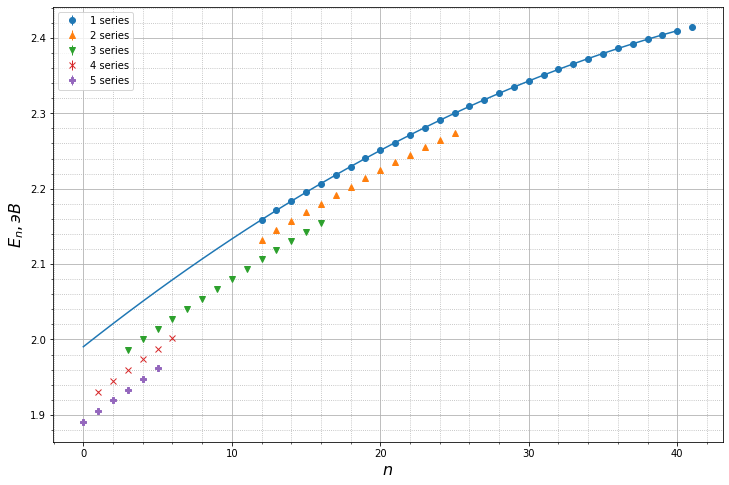

In [475]:
markers = ['o', '^', 'v', 'x', 'P']

plt.figure(figsize=(12,8))
for i, s in enumerate(series):
    plt.errorbar(s.n_prime.dropna().values, s.E, yerr=s.dE, label=f'{i+1} series', lw=0, marker=markers[i], elinewidth=1)
    if i == 0:
        w, cov = np.polyfit(s.n_prime.dropna().values+0.5, s.E.dropna(), deg=2, cov=True)
        cov = np.sqrt(cov.diagonal())
        
        tmp_x = np.arange(0, s.n_prime.dropna().values.max()) + 0.5
        plt.plot(tmp_x-0.5, w[0]*tmp_x**2 + w[1]*tmp_x + w[2], c='tab:blue')

plt.grid(True)
plt.minorticks_on()
plt.xlabel(r"$n$", fontsize=16)
plt.ylabel(r"$E_n, эВ$", fontsize=16)
plt.grid(True, which='minor', linestyle=':')
plt.legend()

In [478]:
w, cov/w

(array([-1.27120912e-04,  1.56935505e-02,  1.98252306e+00]),
 array([-0.00319165,  0.00141029,  0.00014117]))

In [476]:
w[-1], cov[-1]

(1.9825230639012346, 0.0002798759328457899)

In [413]:
1.98+0.02675/2  

1.993375

In [ ]:
1.98 \pm 0.02 eV

In [486]:
# N_ex
0.01533/0.000242 - 0.5

62.84710743801653

In [487]:
# N_gr
0.02675/0.000488150 - 0.5

54.29872989859674

In [488]:
# \delta E_dis_gr
(1/2)*1/0.000488150 * (0.02675)**2

0.7329330123937314

In [490]:
# \delta E_dis_ex
(1/2)*1/0.000243 * (0.01533)**2

0.48555557851239667

In [505]:
2/127*1.3e-3

2.047244094488189e-05

In [502]:
(26.8e-3*1.6e-19/1.0545718e-34)**2*(63.5*1.67e-27) #/1.380650e-23

175.3264511581058

In [510]:
(1+160/4)/(1+0.75*160)

0.33884297520661155